In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import sys
sys.path.append('../data')

import congress_db
from setup_db import Candidate, Contribution, Committee
from sqlalchemy import func

session = congress_db.create_session()

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
print session.query(Candidate.party).distinct().all()

[(u'REP',), (u'DEM',), (u'IND',), (u'PAF',), (u'UNK',), (u'GRE',), (u'NNE',), (u'W',), (u'FED',), (u'LIB',), (u'CST',), (u'CON',), (u'NPA',), (u'OTH',), (u'TX',), (u'DFL',), (u'IDP',), (u'IAP',), (u'CIT',), (u'IGR',), (None,), (u'REF',), (u'0TH',), (u'CRV',), (u'WFP',), (u'LPF',), (u'IP',), (u'LBU',), (u'HRP',), (u'PG',), (u'AIP',), (u'SUS',), (u'AMP',), (u'TEA',), (u'NON',), (u'COM',), (u'UN',), (u'GOP',), (u'SOC',), (u'APF',), (u'LBL',), (u'AKI',), (u'WRI',), (u'UNI',), (u'A99',), (u'AME',), (u'NBC',), (u'HEL',), (u'PCH',), (u'JCN',), (u'ACE',), (u'LRU',), (u'AIC',), (u'VET',), (u'FSP',), (u'OE',), (u'HOL',), (u'FRE',), (u'NLP',), (u'DOG',), (u'NAP',), (u'I',), (u'WTP',), (u'POP',), (u'PFP',), (u'DCG',), (u'UST',), (u'HSA',), (u'DBP',), (u'CMD',), (u'RTL',), (u'PRO',), (u'PPY',), (u'GWP',), (u'RUP',), (u'GAD',), (u'WA',), (u'SIL',), (u'MLG',), (u'ME',), (u'USM',), (u'VOL',), (u'DRP',), (u'LP',), (u'WPP',), (u'UC',), (u'MGD',), (u'THD',), (u'BS',), (u'SEP',), (u'CNC',), (u'DEC',), (u'

In [17]:
def committee_total_contributions(party):
    return session.query(func.sum(Contribution.tx_amount).label('total_cont'), Committee.name).\
                filter(Candidate.party == party).\
                join(Committee).\
                join(Candidate).\
                group_by(Contribution.committee_id).\
                order_by('total_cont desc').\
                all()
                
def plot_interest_groups(party):
    contr = committee_total_contributions(party)
    amounts, committees = zip(*contr)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(amounts[:10], committees[:10], ci=None)
    plt.xlabel('Contribution ($)')
    plt.title('Top contributors to ' + party)

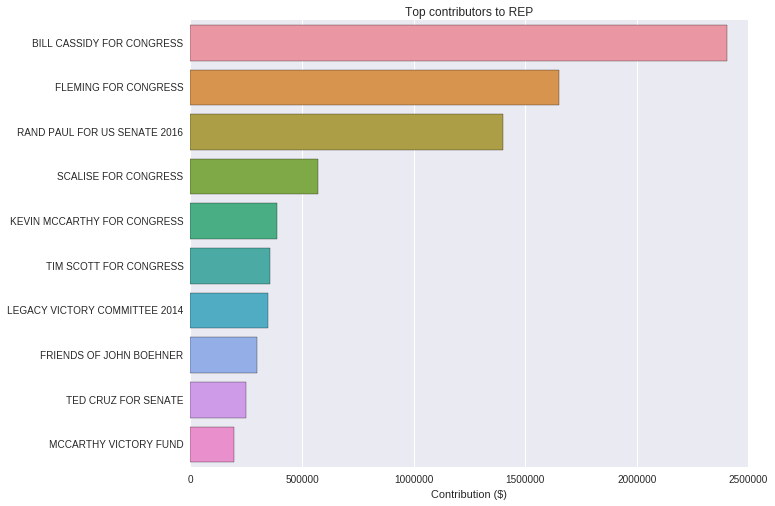

In [18]:
plot_interest_groups('REP')

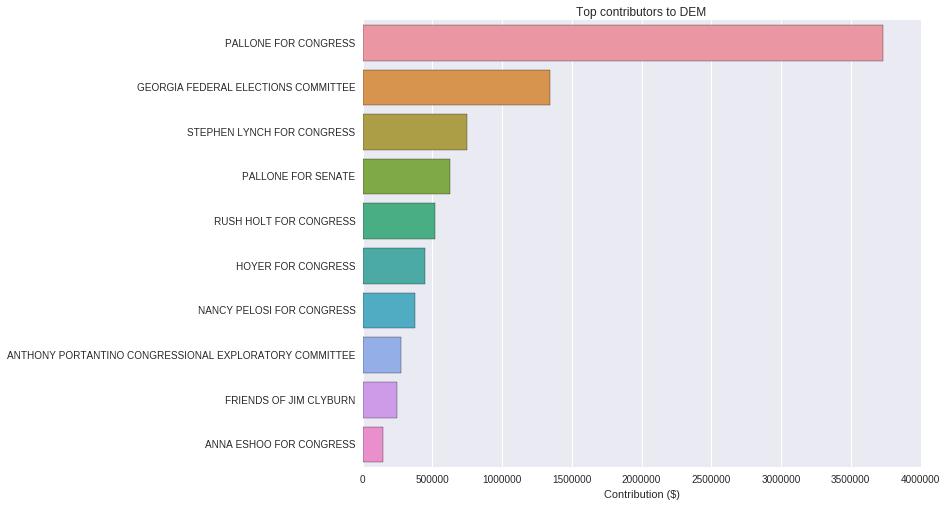

In [19]:
plot_interest_groups('DEM')

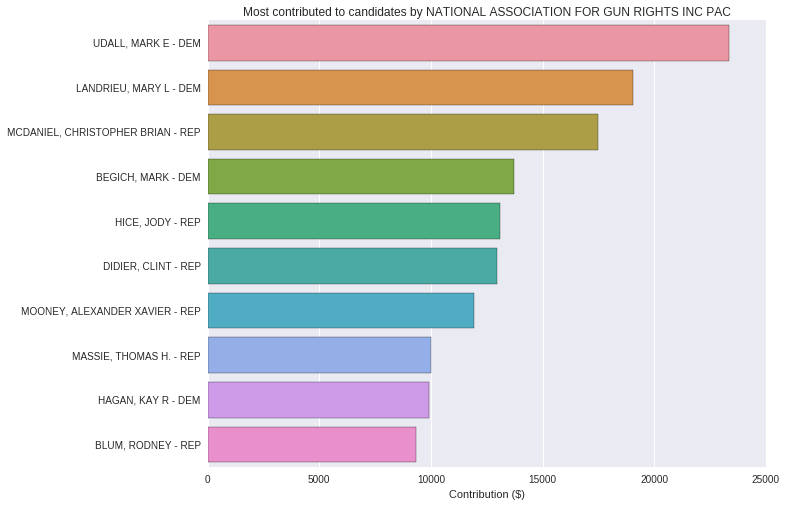

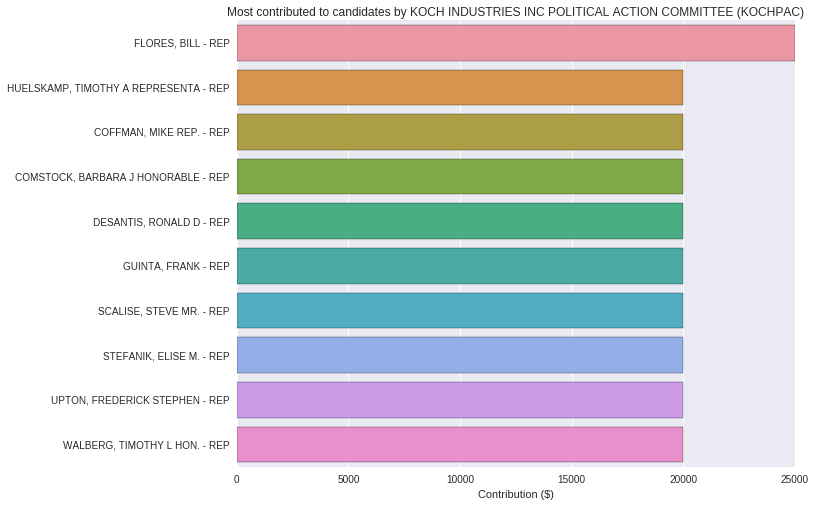

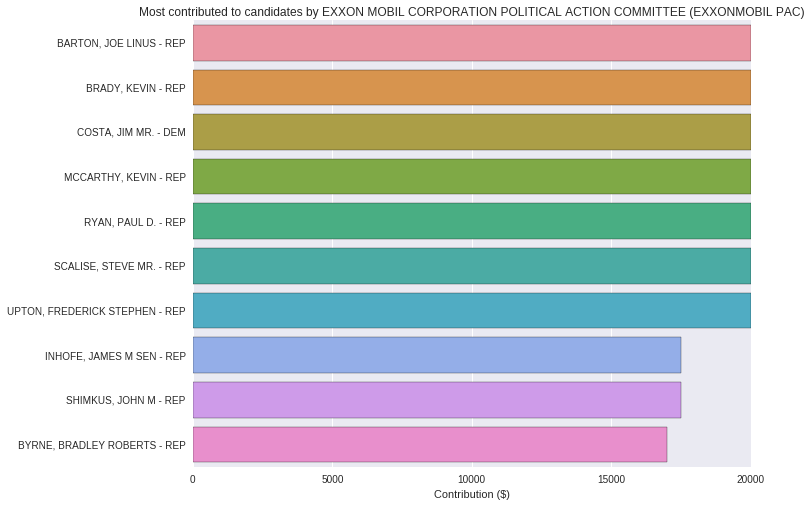

In [64]:
def top_candidates_by_interest_group(group_name):
    return session.query(Candidate.name, Candidate.party, func.sum(Contribution.tx_amount).label('sum_contr')).\
            filter(Committee.name == group_name).\
            filter(Candidate != None).\
            join(Contribution).\
            join(Committee).\
            group_by(Candidate.name).\
            order_by('sum_contr desc').\
            all()
            
def plot_top_candidate_by_interest_group(group_name):
    contr = top_candidates_by_interest_group(group_name)
    candidates, parties, amounts = zip(*contr)
    
    labels = [' - '.join(x) for x in zip(candidates, parties)]
    plt.figure(figsize=(10, 8))
    sns.barplot(amounts[:10], labels[:10], ci=None)
    plt.xlabel('Contribution ($)')
    plt.title('Most contributed to candidates by ' + group_name)
            
plot_top_candidate_by_interest_group('NATIONAL ASSOCIATION FOR GUN RIGHTS INC PAC')
plot_top_candidate_by_interest_group('KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE (KOCHPAC)')
plot_top_candidate_by_interest_group('EXXON MOBIL CORPORATION POLITICAL ACTION COMMITTEE (EXXONMOBIL PAC)')

In [62]:
print session.query(Committee.name, func.sum(Contribution.tx_amount).label('cash')).filter(Committee.name.like('%MOBIL%')).join(Contribution).group_by(Committee.name).order_by('cash desc').all()

[(u'NATIONAL AUTOMOBILE DEALERS ASSOCIATION POLITICAL ACTION COMMITTEE', 3639600.0), (u'EXXON MOBIL CORPORATION POLITICAL ACTION COMMITTEE (EXXONMOBIL PAC)', 2278000.0), (u'UNITED SERVICES AUTOMOBILE ASSOCIATION EMPLOYEE PAC - USAA EMPLOYEE PAC', 1541500.0), (u'STATE FARM MUTUAL AUTOMOBILE INSURANCE COMPANY FEDERAL POLITICAL ACTION COMMITTEE', 984750.0), (u'T-MOBILE USA, INC.  POLITICAL ACTION COMMITTEE (T-PAC)', 549250.0), (u'THE MOBILIZATION PROJECT', 532445.0), (u'ALLIANCE OF AUTOMOBILE MANUFACTURERS INC POLITICAL ACTION COMMITTEE', 75608.0), (u'PRIDE MOBILITY PRODUCTS CORP PAC', 72800.0), (u'STATE AUTO EMPLOYEES FED PAC COMMITTEE OF STATE AUTOMOBILE MUTUAL INSURANCE COMPANY', 38000.0), (u'NATIONAL INDEPENDENT AUTOMOBILE DEALERS ASSOCIATION PAC FUND', 34000.0), (u'NATIONAL MOBILITY EQUIPMENT DEALERS ASSOCIATION POLITICAL ACTION COMMITTEE, INC.', 21400.0), (u'FRIENDS OF SNOWMOBILING PAC', 7000.0), (u'MOTOROLA MOBILITY LLC POLITICAL ACTION COMMITTEE', 4500.0), (u'AUTOMOBILE CLUB OF MI

In [33]:
session.query(Contribution.tx_amount).filter(Committee.name == 'GEORGIA GUN OWNERS POLITICAL ACTION COMMITTEE').join(Committee).all()

[]

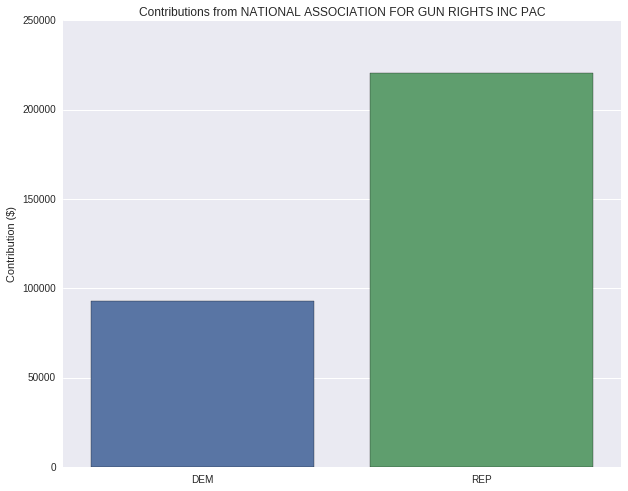

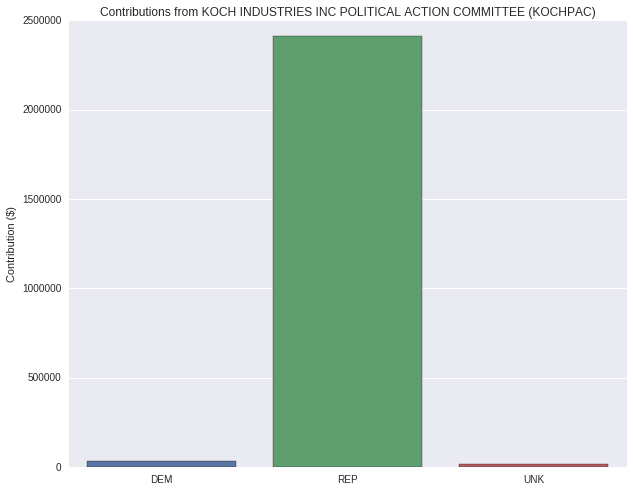

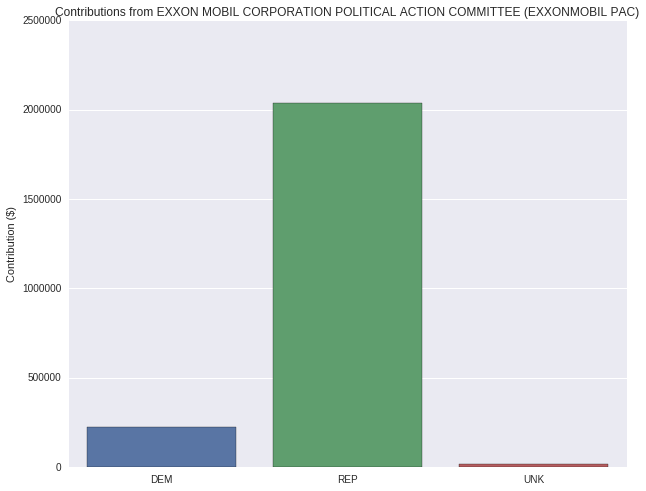

In [63]:
def party_contributions_by_interest_group(group_name):
    return session.query(Candidate.party, func.sum(Contribution.tx_amount)).\
            filter(Committee.name == group_name).\
            join(Contribution).\
            join(Committee).\
            group_by(Candidate.party).\
            all()
            
def plot_party_contributions_by_interest_group(group_name):
    contr = party_contributions_by_interest_group(group_name)
    parties, amounts = zip(*contr)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(parties, amounts, ci=None)
    plt.ylabel('Contribution ($)')
    plt.title('Contributions from ' + group_name)
            
plot_party_contributions_by_interest_group('NATIONAL ASSOCIATION FOR GUN RIGHTS INC PAC')
plot_party_contributions_by_interest_group('KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE (KOCHPAC)')
plot_party_contributions_by_interest_group('EXXON MOBIL CORPORATION POLITICAL ACTION COMMITTEE (EXXONMOBIL PAC)')